# 1. Ridge Regression

### Create DataSet

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# create training dataset
train_points = 20
eps = np.random.normal(0, 1, train_points)

X_train = np.linspace(-5, 5, train_points)
y_train = (X_train+4) * (X_train+1) * (np.cos(X_train)-1) * (X_train-3) + eps

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# create testing data set
test_points = 1000

X_test = np.linspace(-5, 5, test_points)
y_test = (X_test+4) * (X_test+1) * (np.cos(X_test)-1) * (X_test-3)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

Text(0.5, 1.0, 'TEST DATA')

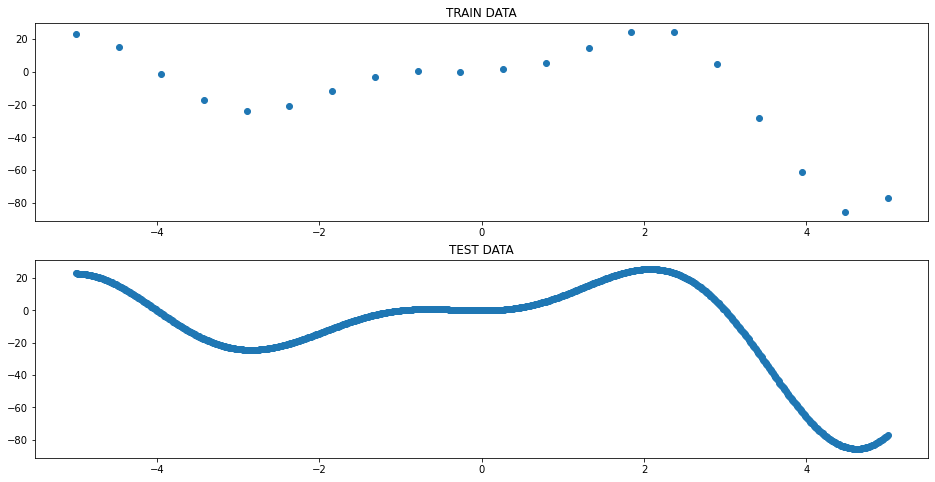

In [2]:
f = plt.figure(figsize=(16,8))
f.add_subplot(2,1,1)
plt.scatter(X_train, y_train)
plt.title('TRAIN DATA')

f.add_subplot(2,1,2)
plt.scatter(X_test, y_test)
plt.title('TEST DATA')



### Fit Ridge Regression Model

In [3]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


Set $\alpha $ value 

In [4]:
alpha = 1.0  

Fit the model and plot the resulting line

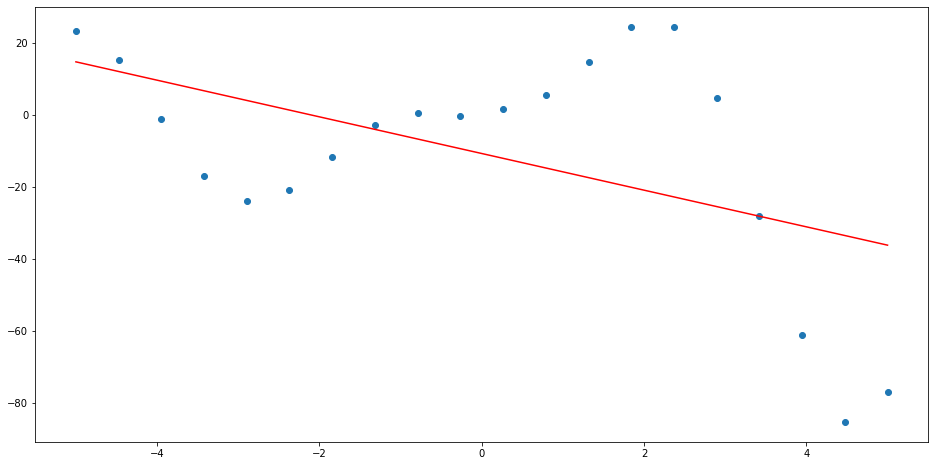

In [5]:
linear_model = Ridge(alpha = alpha)
linear_model.fit(X_train, y_train)

X_matrix = np.ones((train_points,2))
for i in range(train_points):
    X_matrix[i,0] = X_train[i]
coef = np.zeros((2,1))
coef[0,0] = linear_model.coef_
coef[1,0] = linear_model.intercept_

y_ = X_matrix@coef

fig2 = plt.figure(figsize = (16,8))
plt.scatter(X_train,y_train)
plt.plot(X_train,y_,'r')


Test error

In [6]:
X_matrix_test = np.ones((test_points,2))
for i in range(test_points):
    X_matrix_test[i,0] = X_test[i]
y_ = X_matrix_test@coef

In [7]:
RMSE_Ridge = mean_squared_error(y_test,y_,squared = False)
RMSE_Ridge

26.8405033801809

### Kernel Ridge Regression

Gaussian Kernel

In [8]:
from sklearn.kernel_ridge import KernelRidge

How much $\alpha $ impact? Default is 1.0

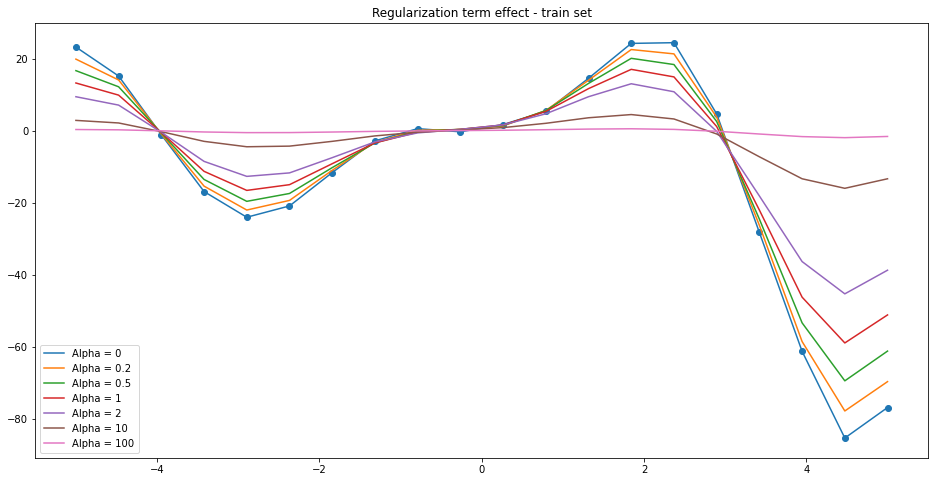

In [9]:
alphas = [0,0.2,0.5,1,2,10,100]

f = plt.figure(figsize=(16,8))
plt.scatter(X_train, y_train)
plt.title('Regularization term effect - train set')

for a in alphas:
    model = KernelRidge(alpha = a, kernel = 'rbf')
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    plt.plot(X_train,y_pred_train, label =f"Alpha = {a}")
    
plt.legend(loc = 'lower left')
    

Since the data are generated with an error $\varepsilon$ that is small, overfitting will not be a problem and lower $\alpha$ leads to better results. In general this isn't true.

In [10]:
for a in [0, 0.1,0.2,0.3,1]:
    model_gauss = KernelRidge(alpha = a, kernel = 'rbf')
    model_gauss.fit(X_train, y_train)
    y_pred = model_gauss.predict(X_test)
    RMSE = mean_squared_error(y_test,y_pred,squared = False)
    print(f'For alpha = {a} RMSE is {RMSE}')

For alpha = 0 RMSE is 0.7787477810210165
For alpha = 0.1 RMSE is 1.4475488219114439
For alpha = 0.2 RMSE is 2.6005199242129478
For alpha = 0.3 RMSE is 3.6898186396805412
For alpha = 1 RMSE is 9.477212346151589


$\alpha$ = 0 should be the best choice, but since this is an exercise on regularized kernel regression I keep $\alpha$ = 0.1 

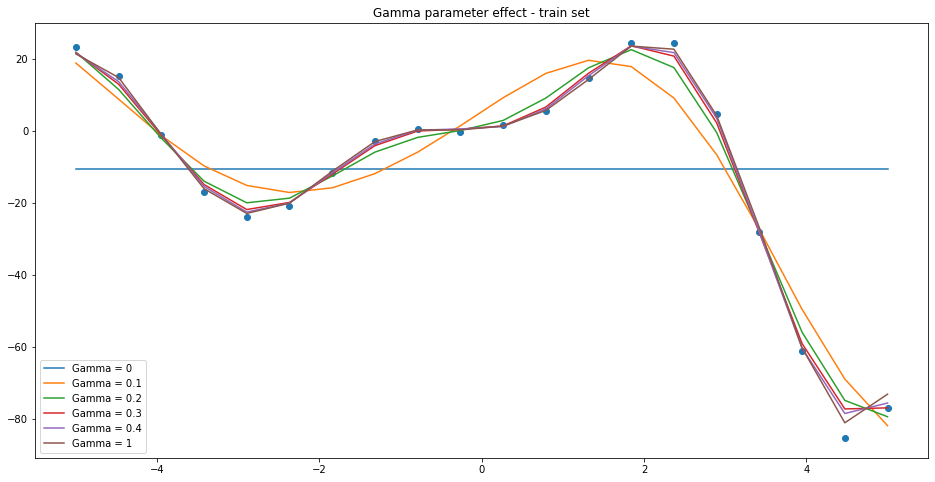

In [11]:
gamma = [0,0.1,0.2,0.3,0.4,1]
f = plt.figure(figsize=(16,8))
plt.scatter(X_train, y_train)
plt.title('Gamma parameter effect - train set')
for g in gamma:
    model = KernelRidge(alpha = 0.1, kernel = 'rbf', gamma = g)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    plt.plot(X_train,y_pred_train, label =f"Gamma = {g}")
plt.legend(loc ='lower left')


Best gamma: 1.0050251256281408, Loss: 1.4476247471356083



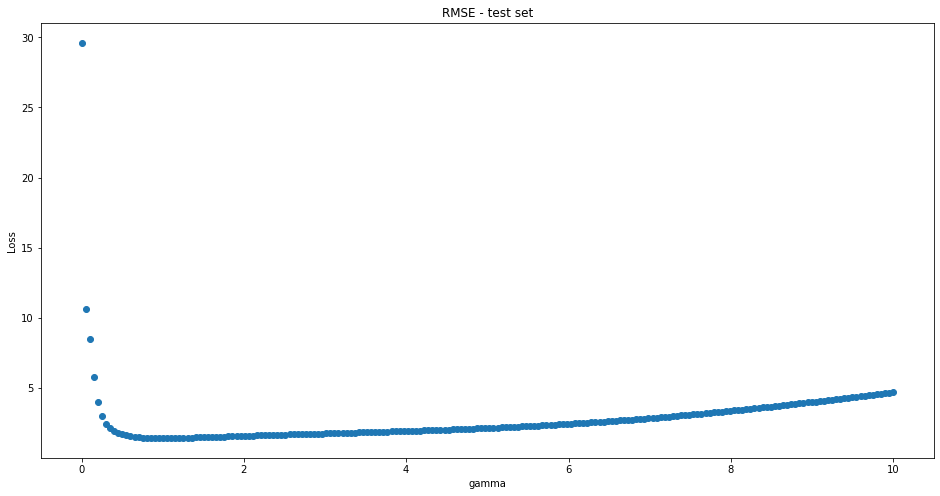

In [12]:
gamma = np.linspace(0,10,200)
RMSE = np.ones(len(gamma))
i = 0
min = 10000
min_index = 0
for g in gamma:
    model = KernelRidge(alpha = 0.1, kernel = 'rbf', gamma = g)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  
    RMSE[i]=mean_squared_error(y_test,y_pred,squared = False)
    if RMSE[i]<min:
        min = RMSE[i]
        min_index = i
    i=i+1

f = plt.figure(figsize=(16,8))
plt.title('RMSE - test set')
plt.scatter(gamma,RMSE)
plt.xlabel('gamma')
plt.ylabel('Loss')

print()
print(f'Best gamma: {gamma[min_index]}, Loss: {min}')
print()
    

Polynomial Kernel


There are two parameters to tune: gamma and the degree. First let's see how the line change with different values of both.


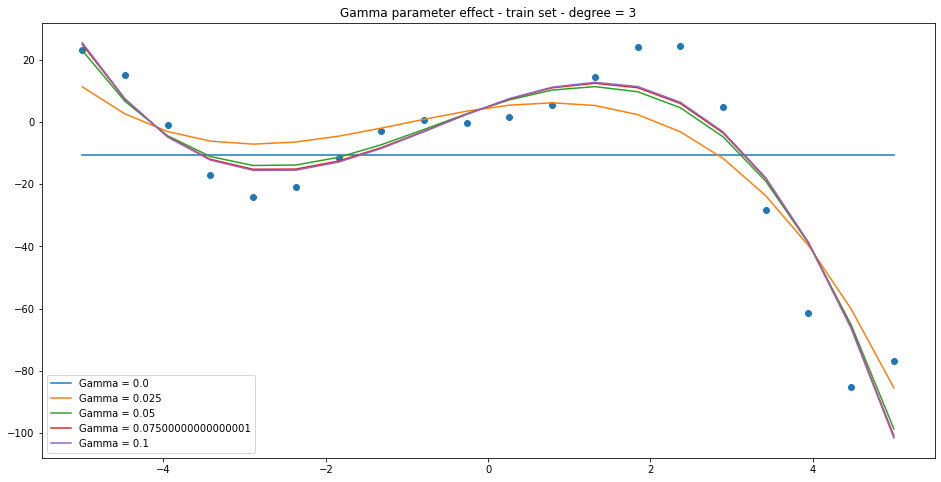

In [13]:
gamma = np.linspace(0,0.1,5)
f = plt.figure(figsize=(16,8))
plt.scatter(X_train, y_train)
plt.title('Gamma parameter effect - train set - degree = 3')
for g in gamma:
    model = KernelRidge(alpha = 0.1, kernel = 'polynomial', gamma = g)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    plt.plot(X_train,y_pred_train, label =f"Gamma = {g}")
plt.legend(loc ='lower left')

Notice how curves converge

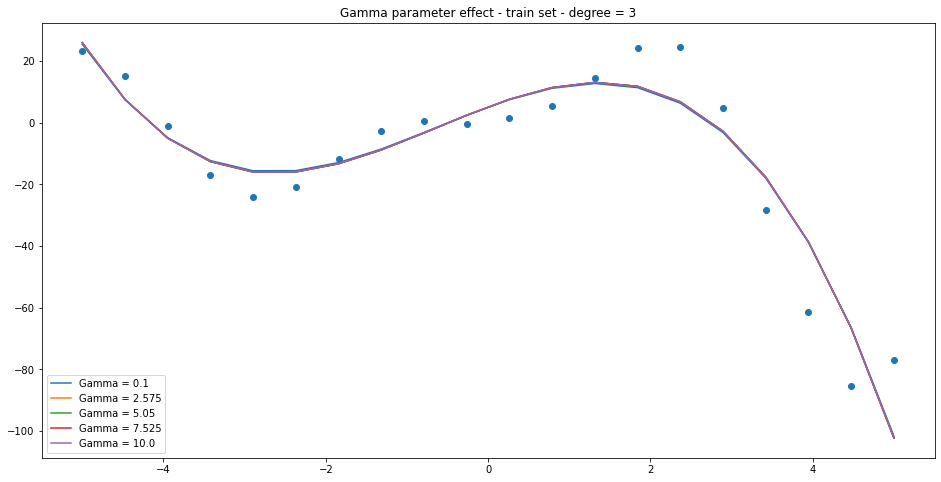

In [14]:
gamma = np.linspace(0.1,10,5)
f = plt.figure(figsize=(16,8))
plt.scatter(X_train, y_train)
plt.title('Gamma parameter effect - train set - degree = 3')
for g in gamma:
    model = KernelRidge(alpha = 0.1, kernel = 'polynomial', gamma = g)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    plt.plot(X_train,y_pred_train, label =f"Gamma = {g}")
plt.legend(loc ='lower left')

Different gamma from 0.1 don't make significative differece when degree = 3. Default value in sklearn is 1/n_features, in this case deafault gamma = 1.


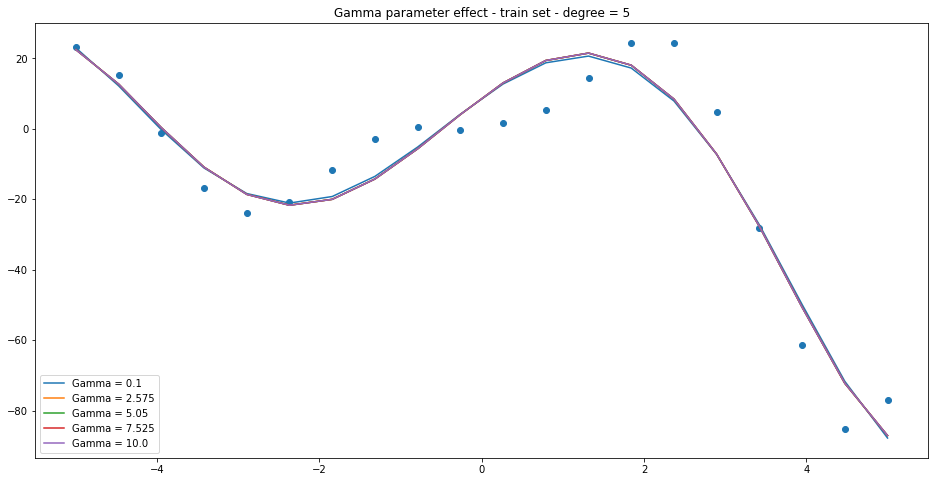

In [15]:
gamma = np.linspace(0.1,10,5)
f = plt.figure(figsize=(16,8))
plt.scatter(X_train, y_train)
plt.title('Gamma parameter effect - train set - degree = 5')
for g in gamma:
    model = KernelRidge(alpha = 0.1, kernel = 'polynomial', gamma = g, degree = 5)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    plt.plot(X_train,y_pred_train, label =f"Gamma = {g}")
plt.legend(loc ='lower left')

Here de degree is 5 and it shows again that curves converge.

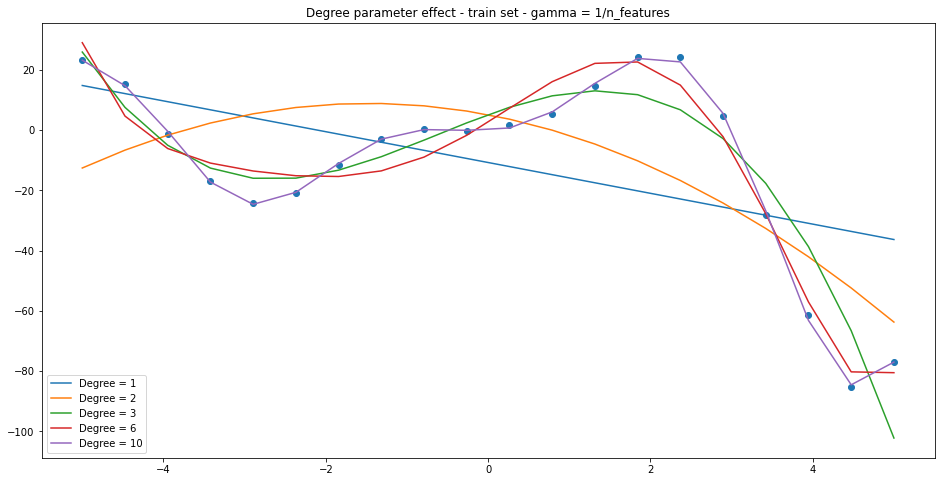

In [16]:
degree = [1,2,3,6,10]
f = plt.figure(figsize=(16,8))
plt.scatter(X_train, y_train)
plt.title('Degree parameter effect - train set - gamma = 1/n_features')
for d in degree:
    model = KernelRidge(alpha = 0.1, kernel = 'polynomial', degree = d)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    plt.plot(X_train,y_pred_train, label =f"Degree = {d}")
plt.legend(loc ='lower left')

In [17]:
gamma = np.linspace(0.1,0.6,50)
degree = [3,4,5,6,7,8,9,10,11,12]
best_gamma = gamma[0]
best_degree = degree[0]

min_loss = 99999999

for g in gamma:
    for d in degree:
        model = KernelRidge(alpha = 0.1, kernel = 'polynomial', degree = d, gamma = g)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        loss = mean_squared_error(y_test,y_pred,squared = False)
        if loss < min_loss:
            best_gamma = g
            best_degree = d
            min_loss = loss         
        

In [18]:
print(f'best gamma --> {best_gamma}')
print(f'best degree --> {best_degree}')
print(f'Loss : {min_loss}')


best gamma --> 0.14081632653061224
best degree --> 11
Loss : 0.3832882053201044


Polynomial kernel fits better than gaussian having lower loss.

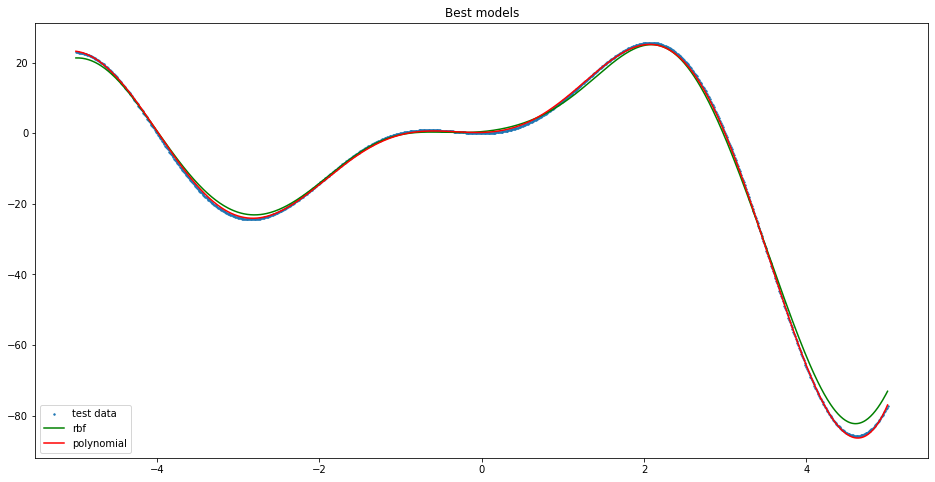

In [19]:
f = plt.figure(figsize=(16,8))
plt.scatter(X_test, y_test,s = 2, label = 'test data')
plt.title('Best models')

model = KernelRidge(alpha = 0.1, kernel = 'polynomial', degree = best_degree, gamma = best_gamma)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)




model2 = KernelRidge(alpha = 0.1, kernel = 'rbf', gamma = 1.0552763819095479 )
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test) 
plt.plot(X_test,y_pred2, 'g', label = 'rbf')
plt.plot(X_test,y_pred, 'r', label = 'polynomial')


plt.legend(loc = 'lower left')   


# 2. PCA

Create and plot the data

In [20]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, noise=0.15, factor=0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

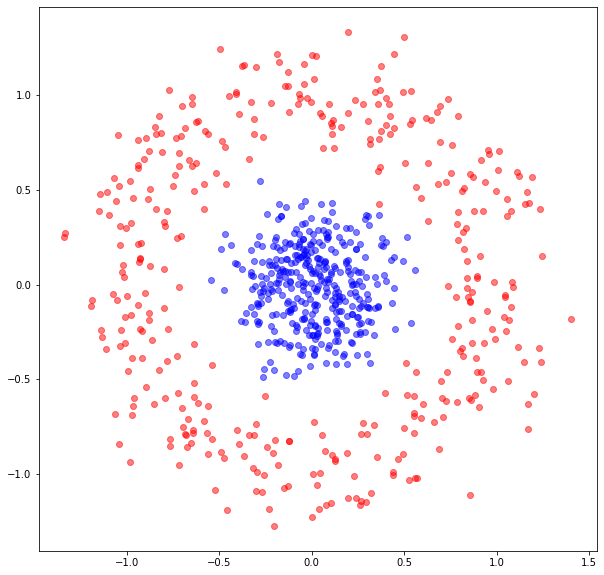

In [21]:
fig = plt.figure(figsize = (10,10))
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='red', alpha=0.5)
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='blue', alpha=0.5)

Apply linear PCA

In [22]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'PC2')

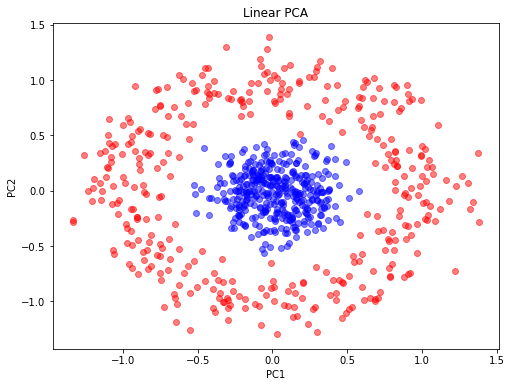

In [23]:
scikit_pca = PCA()
X_spca = scikit_pca.fit_transform(X_train)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y_train==0, 0], X_spca[y_train==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y_train==1, 0], X_spca[y_train==1, 1], color='blue', alpha=0.5)

plt.title('Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

SVM with linear PCA

In [24]:
from sklearn.svm import LinearSVC

svc = LinearSVC().fit(X_spca, y_train)

acc = svc.score(X_test,y_test)


Text(0, 0.5, 'PC2')

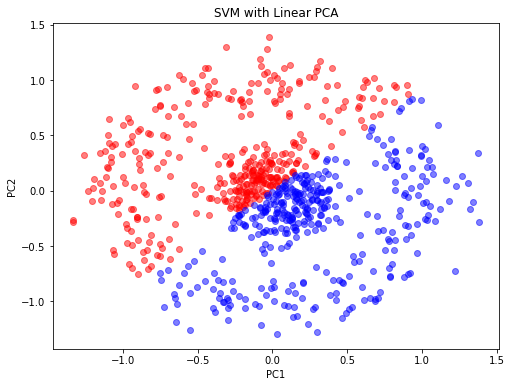

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(X_spca[svc.predict(X_spca)==0, 0], X_spca[svc.predict(X_spca)==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[svc.predict(X_spca)==1, 0], X_spca[svc.predict(X_spca)==1, 1], color='blue', alpha=0.5)

plt.title('SVM with Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [26]:
print(f'accuracy on test set: {acc}')

accuracy on test set: 0.476


Kernel PCA

In [27]:
from sklearn.decomposition import KernelPCA

Text(0, 0.5, 'PC2')

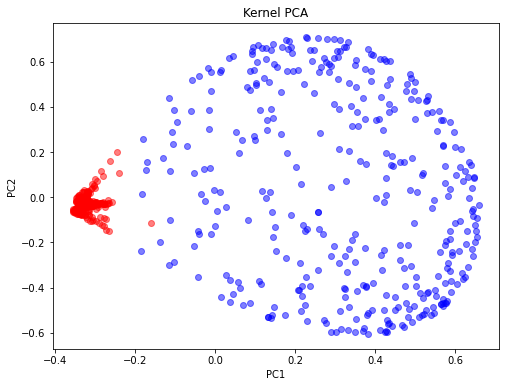

In [28]:
scikit_kernel_pca = KernelPCA(kernel = 'rbf',gamma = 9)
X_kspca = scikit_kernel_pca.fit_transform(X_train)
X_kspca_test =scikit_kernel_pca.transform(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_kspca[y_train==0, 0], X_kspca[y_train==0, 1], color='red', alpha=0.5)
plt.scatter(X_kspca[y_train==1, 0], X_kspca[y_train==1, 1], color='blue', alpha=0.5)

plt.title('Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

SVM with kernel PCA

In [29]:
ksvc = LinearSVC().fit(X_kspca, y_train)

kacc = ksvc.score(X_kspca_test,y_test)


Text(0, 0.5, 'PC2')

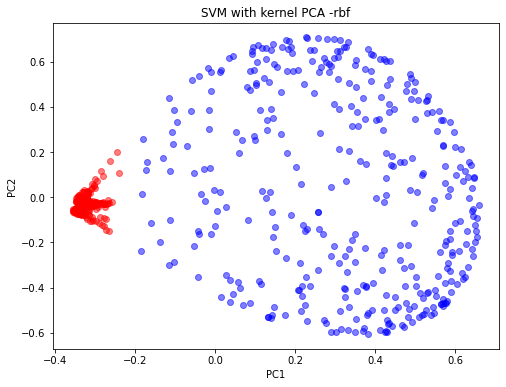

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(X_kspca[ksvc.predict(X_kspca)==0, 0], X_kspca[ksvc.predict(X_kspca)==0, 1], color='red', alpha=0.5)
plt.scatter(X_kspca[ksvc.predict(X_kspca)==1, 0], X_kspca[ksvc.predict(X_kspca)==1, 1], color='blue', alpha=0.5)

plt.title('SVM with kernel PCA -rbf')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [31]:
print(f'accuracy on test set: {kacc}')

accuracy on test set: 0.992


# 3. PCA pt.2

Generate a dataset

In [32]:
from sklearn.datasets import make_classification

In [57]:
X, y = make_classification(n_samples=1000, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

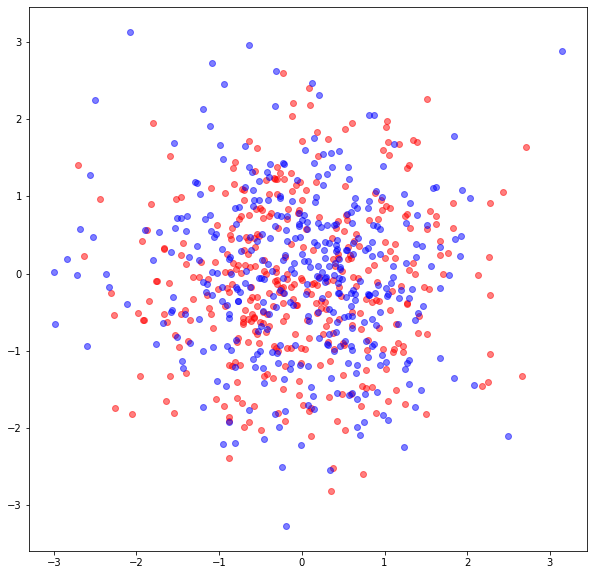

In [34]:
fig = plt.figure(figsize = (10,10))
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='red', alpha=0.5)
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='blue', alpha=0.5)

The dataset has 20 features and 2 classes (0/1)



Text(0, 0.5, 'PC2')

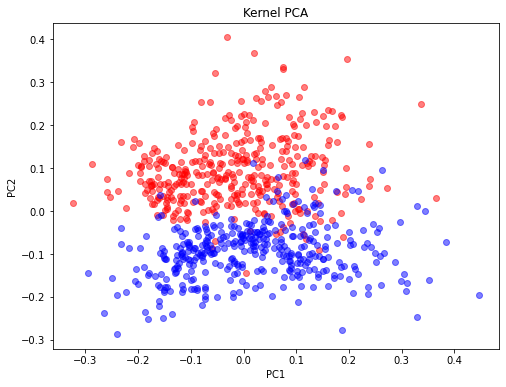

In [35]:
scikit_kernel_pca = KernelPCA(kernel = 'rbf', gamma = 0.1)
X_kspca = scikit_kernel_pca.fit_transform(X_train)
X_kspca_test =scikit_kernel_pca.transform(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_kspca[y_train==0, 0], X_kspca[y_train==0, 1], color='red', alpha=0.5)
plt.scatter(X_kspca[y_train==1, 0], X_kspca[y_train==1, 1], color='blue', alpha=0.5)

plt.title('Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

With 'rbf' kernel and gamma = 0.1 this is how data are projected. It's way better than the original dataset but there could be a better gamma parameter. 


In [36]:
from sklearn.svm import SVC

In [37]:
gamma = np.linspace(0.01,1,10)
best_gamma = gamma[0]
max_acc = 0


for g in gamma:
    mod = KernelPCA(kernel = 'rbf', gamma = g)
    X_kspca = mod.fit_transform(X_train)
    X_kspca_test =mod.transform(X_test)
    svc = LinearSVC().fit(X_kspca, y_train)
    acc = svc.score(X_kspca_test,y_test)
    
   
    if acc > max_acc:
        max_acc = acc
        best_gamma = g
        

print(f'best gamma : {best_gamma}') 
print(f'accuracy : {max_acc}')

best gamma : 0.23
accuracy : 0.936


Text(0, 0.5, 'PC2')

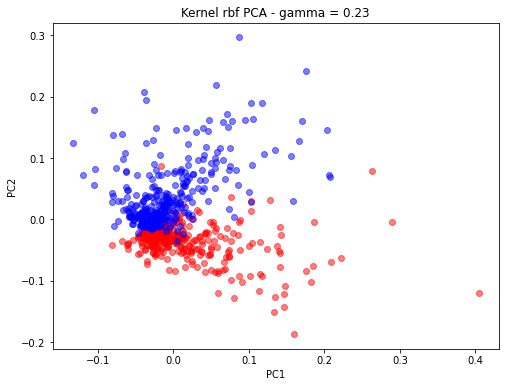

In [38]:
scikit_kernel_pca = KernelPCA(kernel = 'rbf', gamma = best_gamma)
X_kspca = scikit_kernel_pca.fit_transform(X_train)
X_kspca_test =scikit_kernel_pca.transform(X_test)


plt.figure(figsize=(8,6))
plt.scatter(X_kspca[y_train==0, 0], X_kspca[y_train==0, 1], color='red', alpha=0.5)
plt.scatter(X_kspca[y_train==1, 0], X_kspca[y_train==1, 1], color='blue', alpha=0.5)

plt.title(f'Kernel rbf PCA - gamma = {best_gamma}')
plt.xlabel('PC1')
plt.ylabel('PC2')

Can other kernels do better?

In [53]:
gamma = np.linspace(0.01,1,10)
best_gamma = gamma[0]
max_acc = 0


for g in gamma:
    mod = KernelPCA(kernel = 'poly', gamma = g, degree = 3)  #default degree = 3
    X_kspca = mod.fit_transform(X_train)
    X_kspca_test =mod.transform(X_test)
    svc = LinearSVC().fit(X_kspca, y_train)
    acc = svc.score(X_kspca_test,y_test)
    
   
    if acc > max_acc:
        max_acc = acc
        best_gamma = g
        

print(f'best gamma : {best_gamma}') 
print(f'accuracy : {max_acc}')

best gamma : 0.45
accuracy : 0.936


Text(0, 0.5, 'PC2')

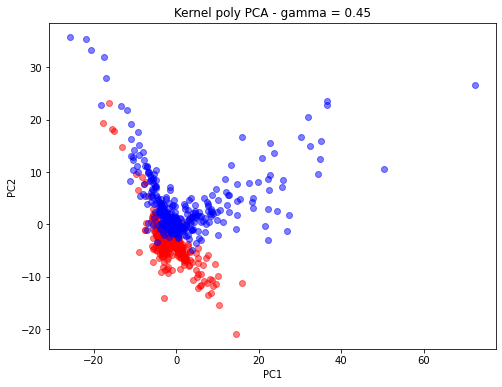

In [54]:
scikit_kernel_pca = KernelPCA(kernel = 'poly', gamma = best_gamma)
X_kspca = scikit_kernel_pca.fit_transform(X_train)
X_kspca_test =scikit_kernel_pca.transform(X_test)


plt.figure(figsize=(8,6))
plt.scatter(X_kspca[y_train==0, 0], X_kspca[y_train==0, 1], color='red', alpha=0.5)
plt.scatter(X_kspca[y_train==1, 0], X_kspca[y_train==1, 1], color='blue', alpha=0.5)

plt.title(f'Kernel poly PCA - gamma = {best_gamma}')
plt.xlabel('PC1')
plt.ylabel('PC2')

Changing the degree doesn't improve the accuracy, so it's set to default value (3)

Text(0, 0.5, 'PC2')

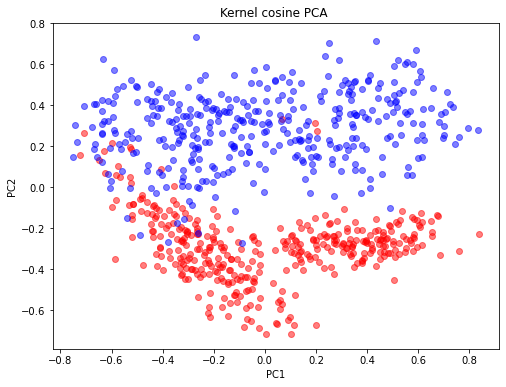

In [59]:
scikit_kernel_pca = KernelPCA(kernel = 'cosine')
X_kspca = scikit_kernel_pca.fit_transform(X_train)
X_kspca_test =scikit_kernel_pca.transform(X_test)


plt.figure(figsize=(8,6))
plt.scatter(X_kspca[y_train==0, 0], X_kspca[y_train==0, 1], color='red', alpha=0.5)
plt.scatter(X_kspca[y_train==1, 0], X_kspca[y_train==1, 1], color='blue', alpha=0.5)

plt.title(f'Kernel cosine PCA ')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [62]:
svc = LinearSVC().fit(X_kspca, y_train)
acc = svc.score(X_kspca_test,y_test)
print(f'accuracy : {acc}')

accuracy : 0.928
